# Problem statement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA & Data preprocessing

In [4]:
# statistics description of numerical columns 
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(517, 31)

In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df.shape

(517, 31)

In [9]:
# checking the missing value
df.isna().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
# Checking how much datapoints are having small and large area
df.size_category.value_counts()


small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

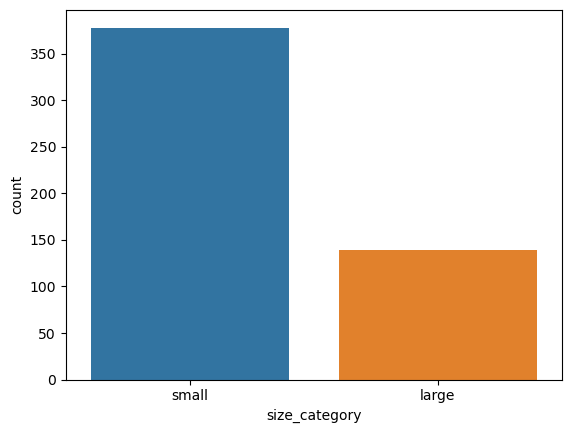

In [11]:
import seaborn as sns
sns.countplot(x = 'size_category', data = df)


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

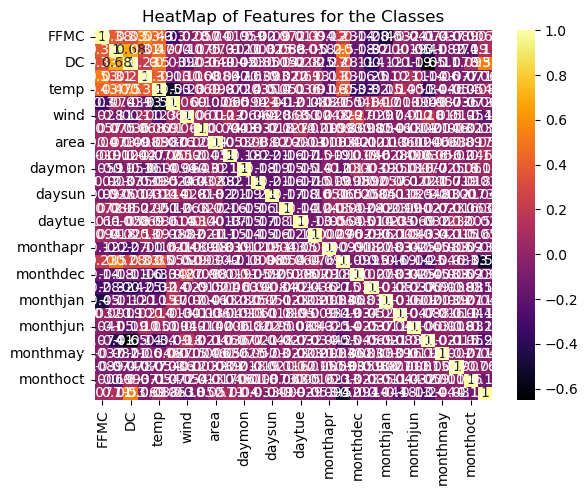

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")


In [13]:
# checking the duplicated row
df[df.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
# remove the all duplicated row
df=df.drop_duplicates(keep=False)

In [15]:
# Dropping columns which are not required

df = df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
df


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [16]:

Y=df[['size_category',"month","day"]]
X=df.drop(['size_category',"month","day"],axis=1)

In [17]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
X_MM=MM.fit_transform(X)

In [18]:
X_MM=pd.DataFrame(X_MM)

In [19]:
X_MM.columns=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']

In [20]:
X_MM

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
496,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
497,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
498,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
499,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [29]:
X_MM.isna().sum()

FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
area    0
dtype: int64

In [49]:
new_df=X_MM.join(Y,how='outer')

In [50]:
new_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,month,day
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,small,mar,fri
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,small,oct,tue
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,small,oct,sat
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,small,mar,fri
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,small,mar,sun
...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,large,aug,sun
497,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,large,aug,sun
498,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,large,aug,sun
499,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,small,aug,sat


In [51]:
#Creating dummy variable for Weather column
df=pd.get_dummies(new_df,columns=['month','day'])

In [52]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,small,...,0,0,0,1,0,0,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,small,...,0,1,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,small,...,0,1,0,0,0,1,0,0,0,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,small,...,0,0,0,1,0,0,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,small,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,large,...,0,0,0,0,0,0,1,0,0,0
497,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,large,...,0,0,0,0,0,0,1,0,0,0
498,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,large,...,0,0,0,0,0,0,1,0,0,0
499,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,small,...,0,0,0,0,0,1,0,0,0,0


In [53]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'size_category', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat',
       'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [54]:
# Encoding target variable 'size category'
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['size_category']=LE.fit_transform(df['size_category'])



In [55]:
df['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
496    0
497    0
498    0
499    1
500    1
Name: size_category, Length: 501, dtype: int32

In [56]:
df.corr()['size_category'].sort_values(ascending=True)

area            -0.309785
month_dec       -0.186745
wind            -0.059959
DMC             -0.059006
rain            -0.057056
day_tue         -0.041421
DC              -0.037552
month_sep       -0.037405
month_may       -0.032177
FFMC            -0.026603
day_sat         -0.025962
day_sun         -0.018069
temp            -0.014031
month_feb       -0.012145
month_jul       -0.004569
month_oct        0.002675
ISI              0.006999
day_fri          0.013984
month_apr        0.015545
day_mon          0.015594
day_wed          0.017906
month_nov        0.027436
month_jun        0.028951
RH               0.034083
month_aug        0.038045
month_jan        0.038840
day_thu          0.043536
month_mar        0.061954
size_category    1.000000
Name: size_category, dtype: float64

In [57]:
# spliting the X and Y variables
Y=df['size_category']
X=df.drop(['size_category'],axis=1)

In [58]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)


Shape of x_train:  (350, 28)
Shape of x_test:  (151, 28)
Shape of y_train:  (350,)
Shape of y_test:  (151,)


# Building SVM model

### by linear 

In [60]:
from sklearn.svm import SVC

In [125]:
clf=SVC(kernel='linear',C=100000)

In [126]:
clf

SVC(C=100000, kernel='linear')

In [127]:
#fit the model
clf.fit(x_train,y_train)

SVC(C=100000, kernel='linear')

In [128]:
#prediction

y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)



In [129]:
#accuracy 
from sklearn import metrics
print("training accuracy---",metrics.accuracy_score(y_train,y_pred_train))
print("test accuracy---",metrics.accuracy_score(y_test,y_pred_test))

training accuracy--- 0.9914285714285714
test accuracy--- 0.9801324503311258


In [130]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       1.00      0.99      0.99       257

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



In [131]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.97      1.00      0.99       107

    accuracy                           0.98       151
   macro avg       0.99      0.97      0.98       151
weighted avg       0.98      0.98      0.98       151



In [132]:
print(metrics.confusion_matrix(y_test,y_pred_test))

[[ 41   3]
 [  0 107]]


In [133]:
print(metrics.confusion_matrix(y_train,y_pred_train))

[[ 92   1]
 [  2 255]]


### non linear; SVM will transform from its original dimension to higher dimensions by applying some kernel transformation technique

### by radial basis function

In [149]:
clf = SVC(kernel='rbf',gamma=0.001) # lower gamma means lower dimension, higher gamma means higher dimension
clf.fit(x_train , y_train)
#prediction

y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

#accuracy 
from sklearn import metrics
print("training accuracy---",metrics.accuracy_score(y_train,y_pred_train))
print("test accuracy---",metrics.accuracy_score(y_test,y_pred_test))

print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.confusion_matrix(y_train,y_pred_train))


training accuracy--- 0.7342857142857143
test accuracy--- 0.7086092715231788
[[  0  44]
 [  0 107]]
[[  0  93]
 [  0 257]]


###  by polynomial function 

In [153]:
clf = SVC(kernel='poly',degree=1)
clf.fit(x_train , y_train)
#prediction

y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

#accuracy 
from sklearn import metrics
print("training accuracy---",metrics.accuracy_score(y_train,y_pred_train))
print("test accuracy---",metrics.accuracy_score(y_test,y_pred_test))

print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.confusion_matrix(y_train,y_pred_train))


training accuracy--- 0.7514285714285714
test accuracy--- 0.7218543046357616
[[  2  42]
 [  0 107]]
[[  7  86]
 [  1 256]]


### Conclusion:. by linear separation we got the best accuracy( training accuracy--- 0.99,test accuracy--- 0.98) as compare to non linear(poly,rbf)